In [32]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
from scipy import spatial
import scipy
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

C:\Users\kaifm\AppData\Local\Temp\ipykernel_14092\4058856098.py:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [33]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')
    return density

In [34]:
#set the root to the Shanghai dataset you download
root = 'D:\PYTHON PROGRAMMING\crowd_detection_hackathon\CSRNet-pytorch'

In [35]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_train,part_A_test]

In [36]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [37]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

D:\PYTHON PROGRAMMING\crowd_detection_hackathon\CSRNet-pytorch\part_A/train_data\images\IMG_1.jpg
(768, 1024)
generate density...


C:\Users\kaifm\AppData\Local\Temp\ipykernel_14092\4051122479.py:24: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')


done.
D:\PYTHON PROGRAMMING\crowd_detection_hackathon\CSRNet-pytorch\part_A/train_data\images\IMG_10.jpg
(683, 1024)
generate density...
done.
D:\PYTHON PROGRAMMING\crowd_detection_hackathon\CSRNet-pytorch\part_A/train_data\images\IMG_100.jpg
(654, 1024)
generate density...
done.
D:\PYTHON PROGRAMMING\crowd_detection_hackathon\CSRNet-pytorch\part_A/train_data\images\IMG_101.jpg
(768, 1024)
generate density...
done.
D:\PYTHON PROGRAMMING\crowd_detection_hackathon\CSRNet-pytorch\part_A/train_data\images\IMG_102.jpg
(768, 1024)
generate density...
done.
D:\PYTHON PROGRAMMING\crowd_detection_hackathon\CSRNet-pytorch\part_A/train_data\images\IMG_103.jpg
(400, 400)
generate density...
done.
D:\PYTHON PROGRAMMING\crowd_detection_hackathon\CSRNet-pytorch\part_A/train_data\images\IMG_104.jpg
(405, 540)
generate density...
done.
D:\PYTHON PROGRAMMING\crowd_detection_hackathon\CSRNet-pytorch\part_A/train_data\images\IMG_105.jpg
(632, 990)
generate density...
done.
D:\PYTHON PROGRAMMING\crowd_dete

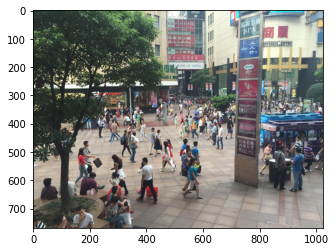

In [51]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_paths[2]))

In [52]:
gt_file = h5py.File(img_paths[2].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'D:\PYTHON PROGRAMMING\crowd_detection_hackathon\CSRNet-pytorch\part_B/train_data\ground_truth\IMG_100.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [48]:
np.sum(groundtruth)# don't mind this slight variation

904.1688

In [49]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train,part_B_test]

In [50]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k